In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

Using TensorFlow backend.


In [2]:
# First we read in the airline passenger
#fileName = "data/international-airline-passengers.csv"
fileName = "data/wolfer-sunspot-numbers-1770-to-1.csv"
#fileName ='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'

# Load the data
df = pd.read_csv(fileName, engine='python', skipfooter=3)


if(fileName=='data/international-airline-passengers.csv'):
    time_column_name = 'Month'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_column_name='Year'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    time_column_name='Time'
    df = df[['Time', 'Close']].copy()

df[time_column_name]=pd.to_datetime(df[time_column_name], format='%Y-%m-%d')
df.set_index([time_column_name], inplace=True)


if(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    train_data = df['2016-01-01 00:00':'2016-05-01 00:00']
    #train_data = df['2016-04-01 00:00':'2016-05-01 00:00']
    #train_data = df['2016-04-27 00:00':'2016-05-01 00:00']
    test_data = df['2016-05-01 00:15':'2016-06-30 23:45']
    
    time_vals = df[train_data.index[0]:test_data.index[len(test_data)-1]]
    train_data = train_data.values.astype('float32')
    test_data = test_data.values.astype('float32')
    number_of_epochs=10
    
    # Extract the raw data, without the dates
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_vals = df[df.index[0]:df.index[len(df)-1]]
    data = df.values
    data = data.astype('float32')
    
    # Now we split the data and apply the data scalar
    split = 71
    train_data =  data[0:split,:]
    test_data = data[split:,:]
    number_of_epochs=300
    
    
elif('data/international-airline-passengers.csv'):
    time_vals = df[df.index[0]:df.index[len(df)-1]]
    data = df.values
    data = data.astype('float32')
    
    # Now we split the data and apply the data scalar
    split = 73
    train_data =  data[0:split,:]
    test_data = data[split:,:]
    number_of_epochs=300


print("train data", train_data.shape)

def future_data(data,lags=1,future=1):
    X, y = [], []
    for row in range(len(data) - lags - future):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags+future-1, 0])
    return np.array(X), np.array(y)

def scale_array(y_vec):
    
    ymax = np.max(y_vec)
    ymin = np.min(y_vec)
    
    print("ymax",ymax)
    print("ymin",ymin)
    
    y_vec_scaled = np.zeros((len(y_vec),1))
    
    for k in range(0,len(y_vec)):
        y_vec_scaled[k][0] = (y_vec[k][0]-ymin)/(ymax-ymin)
    
    return y_vec_scaled,ymin,ymax

def invert_scaling(y_vec_scaled,ymin,ymax):
    
    y_vec = np.zeros(y_vec_scaled.shape)
        
        
    for k in range(0,len(y_vec_scaled)):
        y_vec[k] = ymin+(ymax-ymin)*y_vec_scaled[k]
    
    return y_vec

# Process the train and test data
train_data,train_min,train_max = scale_array(train_data)
test_data,test_min,test_max = scale_array(test_data)

lags=1
future=1

# Process the training data
X_train, y_train = future_data(train_data, lags,future)
X_test, y_test = future_data(test_data, lags,future)

train data (71, 1)
ymax 154.0
ymin 0.0
ymax 125.0
ymin 4.0


In [3]:
# create and fit Feed forward neural network model
model = Sequential()
model.add(Dense(4, input_dim=lags, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, y_train, epochs=number_of_epochs, batch_size=2, verbose=1)

Epoch 1/300
69/69 [==============================] - 0s 6ms/step - loss: 0.1029
Epoch 2/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0810
Epoch 3/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 4/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0537
Epoch 5/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0461
Epoch 6/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0417
Epoch 7/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0383
Epoch 8/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0365
Epoch 9/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0349
Epoch 10/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 11/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0328
Epoch 12/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0319
Epoch 13/300
69/69 [=================

69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 103/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 104/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 105/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 106/300
69/69 [==============================] - 0s 934us/step - loss: 0.0201
Epoch 107/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 108/300
69/69 [==============================] - 0s 992us/step - loss: 0.0203
Epoch 109/300
69/69 [==============================] - 0s 930us/step - loss: 0.0202
Epoch 110/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 111/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 112/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 113/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 114/300
69/69 [===

69/69 [==============================] - 0s 982us/step - loss: 0.0204
Epoch 202/300
69/69 [==============================] - 0s 902us/step - loss: 0.0203
Epoch 203/300
69/69 [==============================] - 0s 932us/step - loss: 0.0203
Epoch 204/300
69/69 [==============================] - 0s 966us/step - loss: 0.0201
Epoch 205/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 206/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 207/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 208/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 209/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 210/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 211/300
69/69 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 212/300
69/69 [==============================] - 0s 916us/step - loss: 0.0202
Epoch 213/300
69/69 

69/69 [==============================] - 0s 1ms/step - loss: 0.0204


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss'])


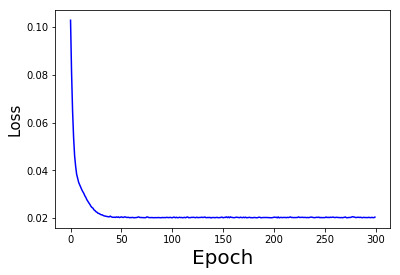

In [5]:
print(history.history.keys())


if(fileName=='data/international-airline-passengers.csv'):
    loss_label = 'Loss_airline.pdf'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    loss_label = 'Loss_sunspot.pdf'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    loss_label = 'Loss_EURUSD.pdf'

plt.plot()
plt.plot(history.history['loss'],color='b')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=20)
plt.savefig(loss_label,bboxes='tight')
plt.show()

(27, 1)
Estimated Sigma:  0.0679415913506 0.0897701098298
(100, 27, 1)
-------------------------------------
MSE:  101.108211329
RMSE:  10.0552578947
-------------------------------------


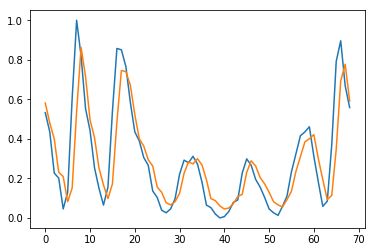

In [6]:
# generate predictions for training
uncertainty_samples = 100

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

print(test_predict.shape)

residuals = np.abs(y_test.reshape(-1, 1) - test_predict.reshape(-1, 1))

# Here we estimate the average residual 
sigma = 0.5*np.mean(residuals)
std_sigma =  0.5*np.std(residuals)
print("Estimated Sigma: ", sigma, np.std(residuals))

plt.plot(y_train)
plt.plot(train_predict)


test_predictions = []
for k in range(0,uncertainty_samples):
    test_predict = model.predict(X_test)+np.random.normal(sigma, std_sigma, test_predict.shape)
    test_predictions.append(test_predict)

test_predictions = np.asarray(test_predictions)



y = test_predict.flatten()[future:]

def return_min_max_prediction(test_predictions,i):
    
    y_vec = [ test_predictions[k][i][0] for k in range(0,test_predictions.shape[0])]
    
    ymin = np.min(y_vec)
    ymax = np.max(y_vec)
    
    return ymin,ymax

print(test_predictions.shape)
y_min = np.asarray([return_min_max_prediction(test_predictions,i)[0] for i in range(0,len(y))])
y_max = np.asarray([return_min_max_prediction(test_predictions,i)[1] for i in range(0,len(y))])
x = np.arange(-future,len(y_min)-future)


# Unscale all of the data
#print(y_test.shape)
y_test = invert_scaling(y_test,test_min,test_max)
y_min = invert_scaling(y_min,test_min,test_max)
y_max = invert_scaling(y_max,test_min,test_max)
y = invert_scaling(y,test_min,test_max)


# Compute the root mean squared error
mse = ((y_test[:-1].reshape(-1, 1) - y.reshape(-1, 1)) ** 2).mean()


print('-------------------------------------')
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
print('-------------------------------------')


#============================================================================================
# Unscale data
#test_predictions = scaler.inverse_transform(test_predictions)
y_train = invert_scaling(y_train,train_min,train_max)
train_predict = invert_scaling(train_predict,train_min,train_max)


x_test = range(len(y_train),len(y_train)+len(y_test))
x = range(len(y_train),len(y_train)+len(y))



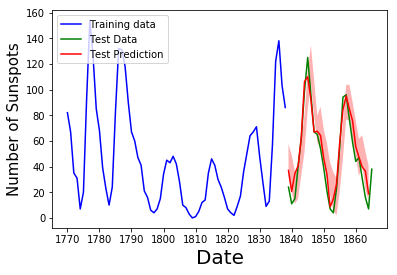

In [7]:

if(fileName=='data/international-airline-passengers.csv'):
    time_steps = 15
    time_format= "%Y"
    y_label = 'Number of Airline Passengers'
    output_name = 'Airline_Passengers_NN.pdf'
elif(fileName=='data/wolfer-sunspot-numbers-1770-to-1.csv'):
    time_steps = 10
    time_format= "%Y"
    y_label = 'Number of Sunspots'
    output_name = 'Sunspot_Forecast_NN.pdf'
elif(fileName=='data/EURUSD_15m_BID_01.01.2010-31.12.2016.csv'):
    time_format= "%m-%H:%M"
    time_steps = 2800
    y_label = 'Exchange Rate EUR/USD'
    output_name = 'EURO_USD_exchange_rate_NN.pdf'


vals= range(0,len(y_train)+len(y_test),time_steps)
labels = [time_vals.index[k].strftime(time_format) for k in vals]


plt.xticks(vals, labels)
plt.ylabel(y_label,fontsize=15)
plt.xlabel('Date',fontsize=20)
plt.plot(y_train, label='Training data',color='b');
plt.plot(x_test,y_test.reshape(-1, 1), label='Test Data', color='g')
plt.plot(x,y, label='Test Prediction', color='red')
plt.fill_between(x, y_min, y_max, facecolor='red', interpolate=True,alpha=0.3)
plt.legend(loc=2)
plt.savefig(output_name,bboxes='tight')
plt.show()